# The Probability Mass Function - Lab

The class size paradox describes apparent contradictory findings where a total allocation of resources is fixed. 
The idea behind this paradox is that there is a difference in how events are actually distributed and how events are perceived to be distributed. These types of divergence can have important consequences for data analysis. Probability mass functions (PMFs) can help resolve some of these situations, as you'll learn below.

## Objectives

You will be able to:

* Explain the class size paradox
* Create visualizations to visually compare actual and biased observations 
* Calculate the mean from PMFs to identify the expected value


## The Problem 

At a university, the expected student-to-teacher ratio is 32.5 : 1. But randomly interviewed students often feel that their average class size is bigger than 32.5. There are two main reasons for this:

1. Students typically take 4 - 5 classes at any given time, but teachers usually only teach 1 or 2 classes.
2. The number of students in a small class is small, and the number of students in a large class is large.

Due to the second fact, while randomly taking feedback from students (and sampling randomly), it is expected we will come across _more_ students from larger classes simply because there are more of them.

Let's work through a set of data to recreate and analyze this paradox. 

Suppose that a college offers 74 classes in a term. We can start with the following distribution of sizes and counts:

| Class size |  Class count |
|--------|------|
|15-19|	10|
|20-24|	10|
|25-29|	18|
|30-34|	6|
|35-39|	8|
|40-44|	10|
|45-49|	5|
|50-54|	3|
|55-59| 4|

If the campus manager were asked about the average class size, he would perform the following tasks:

1. Construct a PMF from given data
2. Compute the mean using the PMF

Let's follow the management approach first and see what expected value we get from our PMF. Here is a `size_and_count` dictionary to get you started. Calculate the PMF from this data as we have done before. To make it slightly more straightforward, we have averaged the class sizes for each class, i.e. for size "15 - 19", we use the average value, 17.

In [1]:
size_and_count = { 17: 10, 22: 10, 27: 18, 32: 6, 37: 8, 42: 10, 47: 5, 52: 3, 57: 4 }

Following the approach seen in the previous lesson, calculate the PMF by normalizing each size. 

In [2]:
# Determine total number of classes
sum_class = sum(size_and_count.values())
# Divide each class size value by the total number of classes
pmf = [round(value/sum_class, 3) for value in size_and_count.values()] 
    
sizes = list(size_and_count.keys())
sizes, pmf

([17, 22, 27, 32, 37, 42, 47, 52, 57],
 [0.135, 0.135, 0.243, 0.081, 0.108, 0.135, 0.068, 0.041, 0.054])

As an additional check, these probability values must sum to 1. Let's check for that. Run the following cell: 

In [3]:
# The output should be 1
import numpy as np 
np.array(pmf).sum()

1.0

## Calculate the Mean or Expected Value $E(X)$

We can now calculate the mean or **Expected Value** for this distribution.

>The mean $\mu$ or expected value **E(X)** of a random variable $X$ is the sum of the possible values for $X$ weighted by their respective probabilities.

$$ E(X) = \mu = \sum_i p(x_i)x_i$$

In simple terms, you have to multiply each element in the sizes list by their probability of occurrence then sum the resulting values. We can do this in one line of code using NumPy broadcasting.

In [4]:
# Calculate the expected value (mu) using formula above
mu = np.multiply(sizes, pmf).sum()
mu 

# 32.49

32.49

Recall, we expected the average class size to be 32.5. Indeed, the calculation above confirms this. We can plot a PMF function based on our findings for visualization. 

<BarContainer object of 9 artists>

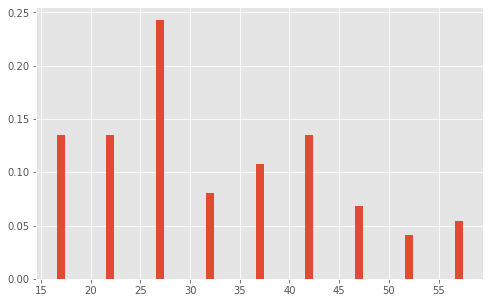

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(sizes, pmf)

## Random Student Survey

Next, we conduct a survey on a random group of students about their class sizes and then compute the mean. Paradoxically, we observed that the average class is bigger than 32.5. How did this happen? Let's see this in action below:

First, let's compute a distribution as a likely observation **by students**, where the probability associated with each class size is "biased" by the **number of students** in the class. If this sounds confusing, think of it this way: instead of calculating a PMF using the counts of class sizes, calculate it using the counts of students.

Perform the following tasks to introduce this bias. 

* For each class size $x$, multiply the class probability by $x$, the number of students who observe that particular class size
* Get the sum of biased class sizes

The result is a new PMF that represents the biased distribution.

In [6]:
#For each class size  𝑥 , multiply the class probability by  𝑥 , 
#the number of students who observe that particular class size
biased = np.multiply(sizes, pmf)
#the sum of biased class sizes
biased_sum = np.sum(biased)
biased, biased_sum
# (array([2.295, 2.97 , 6.561, 2.592, 3.996, 5.67 , 3.196, 2.132, 3.078]), 32.49)

(array([2.295, 2.97 , 6.561, 2.592, 3.996, 5.67 , 3.196, 2.132, 3.078]), 32.49)

You can now normalize the new biased list with the sum of its values, just like you did before. 
- Normalize the biased list and calculate the new PMF

In [8]:
pmf2 = []
for b in biased:
    pmf2.append(round(b/biased_sum, 3))
sizes, pmf2
# ([17, 22, 27, 32, 37, 42, 47, 52, 57],
# [0.071, 0.091, 0.202, 0.08, 0.123, 0.175, 0.098, 0.066, 0.095])

([17, 22, 27, 32, 37, 42, 47, 52, 57],
 [0.071, 0.091, 0.202, 0.08, 0.123, 0.175, 0.098, 0.066, 0.095])

You can see that probability values in this PMF are different than our original pmf. Just like before, you can calculate the expected value $\mu$.  

In [9]:
mu_biased = np.multiply(sizes, pmf2).sum()
mu_biased
# 36.577

36.577

## Here comes the paradox 

Here we see it, the average or expected value of biased results comes out much higher than the actual values. In some situations, a paradox like this can be mind-boggling. As an extra measure, you can inspect both PMFs side by side visually to see the differences. 

* Plot a figure with two axes
* Show pmf and pmf2 side by side

Text(0.5, 1.0, 'Probability Mass Function-Observed')

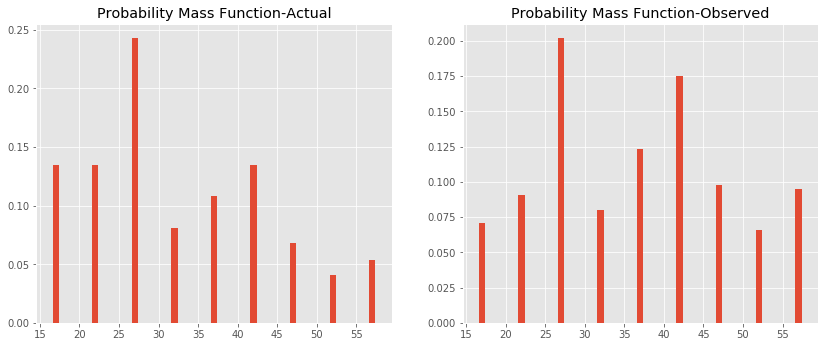

In [11]:
# Plot pmfs side by side
new_figure = plt.figure(figsize=(14, 5.5))
ax1 = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)
ax1.bar(sizes, pmf)
ax1.set_title('Probability Mass Function-Actual')
ax2.bar(sizes, pmf2)
ax2.set_title('Probability Mass Function-Observed')

Your results tell you that in the biased distribution there are fewer small classes and more large classes. 

The mean of the biased distribution is 36.577, which is quite a bit higher than the actual mean (~32.5).

For an even more direct comparison, plot these PMFs on top of each other and change the parameter `alpha` so you can see both distributions well.

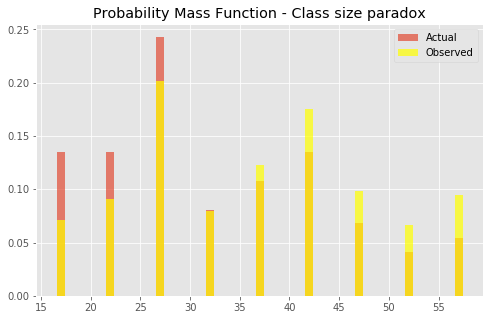

In [12]:
# Plot pmfs overlapping
plt.figure(figsize=(8, 5))
plt.bar(size_and_count.keys(), pmf, label= 'Actual', alpha = 0.7 );
plt.bar(size_and_count.keys(), pmf2, label= 'Observed', color= "yellow", alpha = 0.7);
plt.title ("Probability Mass Function - Class size paradox");
plt.legend()
plt.show()

Here is the key: for smaller class sizes, the probability of coming across a students is lower than the actual probability. For larger classes, the probability of coming across a student is much higher than actual probability. This explains why the paradox takes place!

## Summary 
In this lesson, we looked at a common paradox called the "class size paradox", which deals with differences in observation by different people based on their circumstances. 

Note that this phenomenon is not just limited to class sizes. It applies to many scenarios where people are grouped together. This paradox can become really complicated due to the large number of individuals involved and the resulting variations in the probabilities of their observations which arise due to their settings. 